In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
#for vizualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [14]:
#to read data
import pandas_datareader as pdr

In [8]:
#for timestamp
from datetime import datetime

In [9]:
#for division
from __future__ import division

In [10]:
#creating a list of Tech Stock 
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [11]:
#considering analysis between today and a year ago
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [15]:
#Using globals() is way of setting the dataframe names

for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end)  #using yahoo finance

In [31]:
#working with Apple stocks 
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-12,86.949997,83.555000,86.180000,84.699997,200146000.0,84.133095
2020-06-15,86.419998,83.144997,83.312500,85.747498,138808800.0,85.173584
2020-06-16,88.300003,86.180000,87.864998,88.019997,165428800.0,87.430885
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.309204
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979


In [19]:
#summary stocks
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,120.973234,117.905446,119.555298,119.449712,1.245264e+08,119.054349
std,13.137854,12.947596,13.155370,13.017755,5.393529e+07,13.135242
min,86.419998,83.144997,83.312500,84.699997,4.669130e+07,84.133095
25%,115.982500,112.657499,114.520002,114.832500,8.819405e+07,114.269588
50%,123.649998,120.369999,122.164997,121.869999,1.113192e+08,121.572643
75%,129.727501,126.772501,128.540001,127.950003,1.508143e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [20]:
#general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-06-12 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

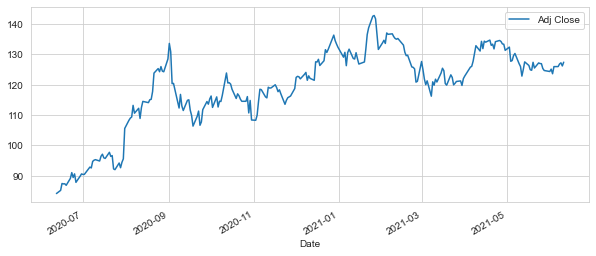

In [22]:
#Historical view of the closing price
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

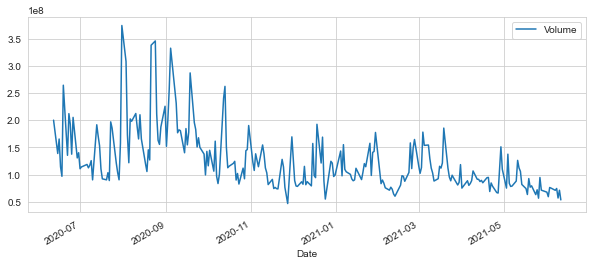

In [23]:
#Plotting a total volume of stocks being traded each month of the past year
AAPL['Volume'].plot(legend = True, figsize =(10,4))

In [33]:
#Moving Averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(float(ma))
    
    AAPL[column_name] = AAPL.rolling(AAPL['Adj Close'],ma).mean()

ValueError: window must be an integer

In [ ]:
#Rise of the stock hence analyze the daily changes of the stock 

<AxesSubplot:xlabel='Date'>

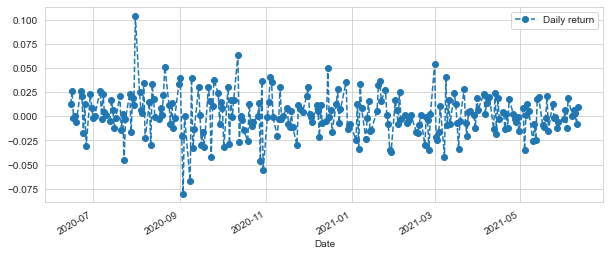

In [35]:
AAPL['Daily return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily return'].plot(figsize = (10,4),legend = True, linestyle = '--', marker = 'o')

C:\Users\Arthish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily return', ylabel='Density'>

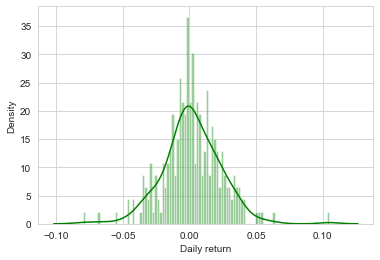

In [38]:
#overall look at the average daily return using histogram
sns.distplot(AAPL['Daily return'].dropna(),bins = 100,color = 'green')

In [39]:
#create a dataframe of all the closing prices for the tech list
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [40]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-12,84.133095,1413.180054,185.939621,2545.020020
2020-06-15,85.173584,1419.849976,187.128113,2572.679932
2020-06-16,87.430885,1442.719971,191.713745,2615.270020
2020-06-17,87.309204,1451.119995,192.377289,2640.979980
2020-06-18,87.343979,1435.959961,194.437363,2653.979980
...,...,...,...,...
2021-06-07,125.900002,2466.090088,253.809998,3198.010010
2021-06-08,126.739998,2482.850098,252.570007,3264.110107
2021-06-09,127.129997,2491.399902,253.589996,3281.149902


In [41]:
tech_rets = closing_df.pct_change()

In [42]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-12,NaN,NaN,NaN,NaN
2020-06-15,0.012367,0.004720,0.006392,0.010868
2020-06-16,0.026502,0.016107,0.024505,0.016555
2020-06-17,-0.001392,0.005822,0.003461,0.009831
2020-06-18,0.000398,-0.010447,0.010709,0.004922


C:\Users\Arthish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


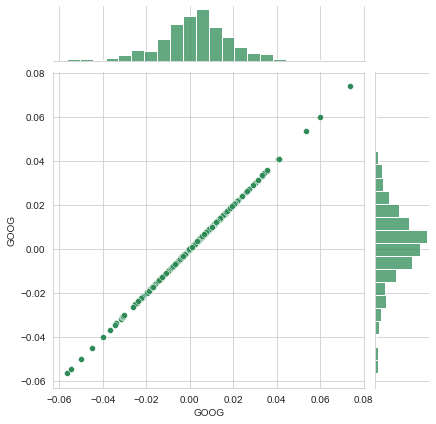

In [43]:
#compare too stocks for correlation
#positive linear relationship when same stocks are compared
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color = 'seagreen')

C:\Users\Arthish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


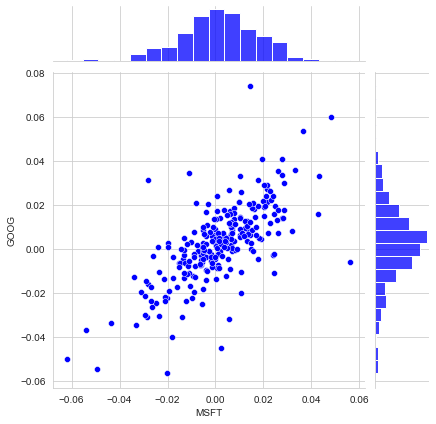

In [44]:
#correlation when two different stocs are compared 
sns.jointplot('MSFT','GOOG',tech_rets,kind = 'scatter',color = 'blue')

In [45]:
from IPython.display import SVG

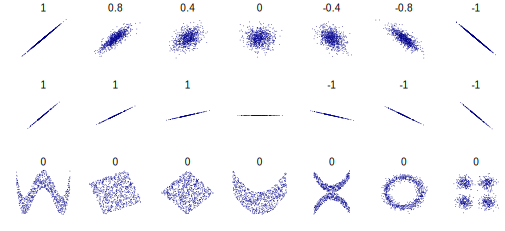

In [48]:
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [49]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-12,NaN,NaN,NaN,NaN
2020-06-15,0.012367,0.004720,0.006392,0.010868
2020-06-16,0.026502,0.016107,0.024505,0.016555
2020-06-17,-0.001392,0.005822,0.003461,0.009831
2020-06-18,0.000398,-0.010447,0.010709,0.004922


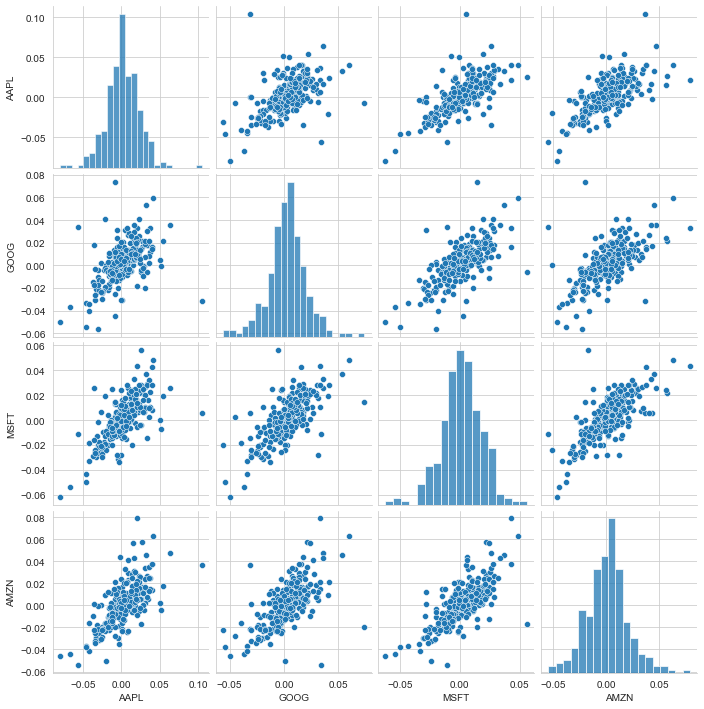

In [50]:
#using pairplot to see the combo of all possible combinations
sns.pairplot(tech_rets.dropna())

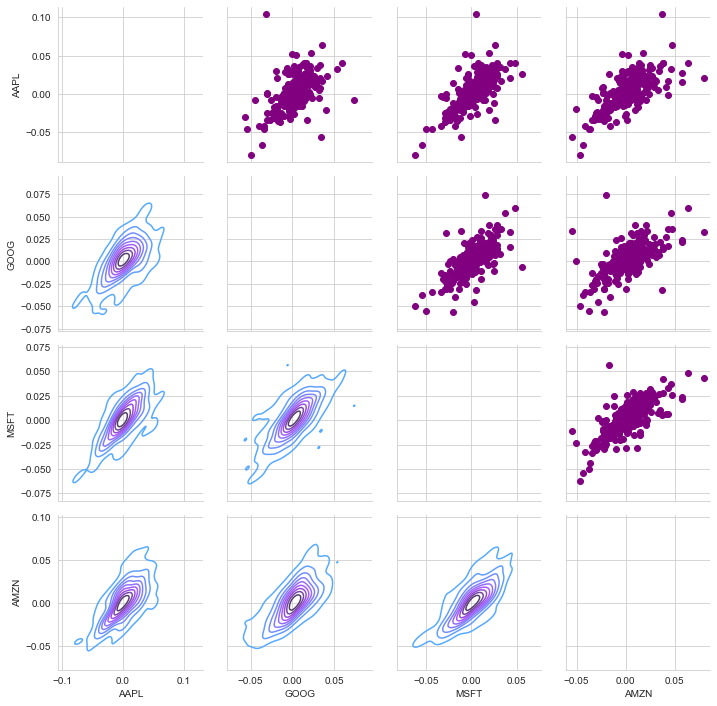

In [52]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

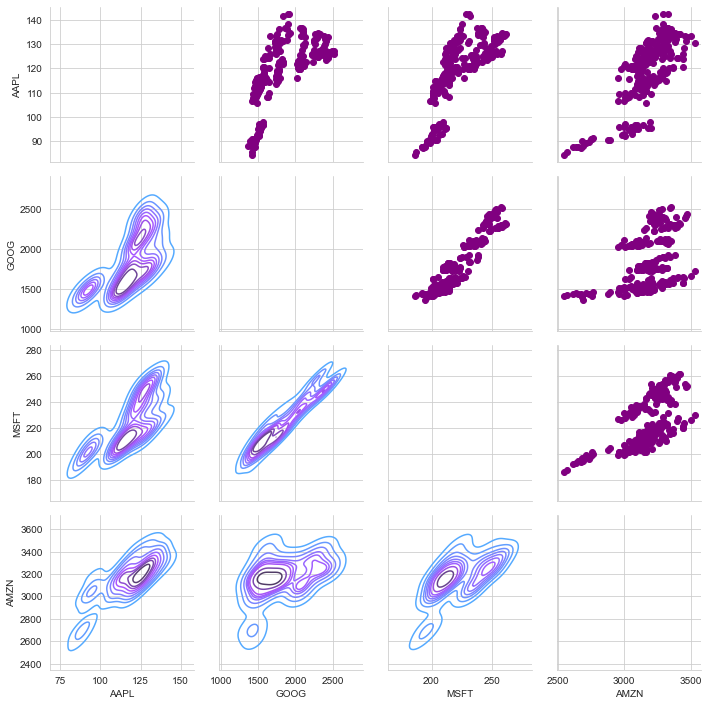

In [53]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

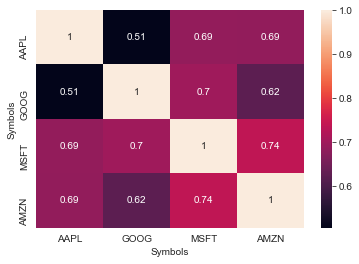

In [56]:
#correlation heatmap with values to better understand the correlation values 
sns.heatmap(tech_rets.dropna().corr(),annot = True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

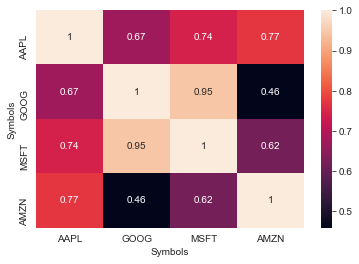

In [59]:
sns.heatmap(closing_df.corr(),annot=True)

In [ ]:
#risk Analysis 
#comparing expected return with the standard deviation of daily returns 

In [60]:
rets = tech_rets.dropna()

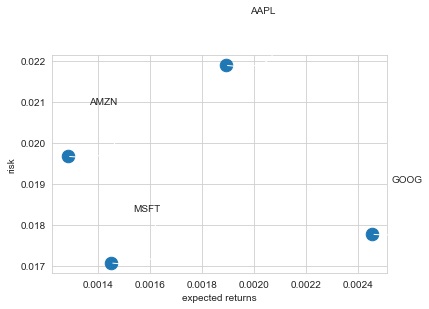

In [68]:
area = np.pi*50

plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('expected returns')
plt.ylabel('risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext=(50,50),
    textcoords = 'offset points',ha = 'right',va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-1.0'))

In [ ]:
#greater expected return and less risk is good
#value at risk is the amt of money we could expect to lose(putting at risk) for a give CI 

C:\Users\Arthish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily return', ylabel='Density'>

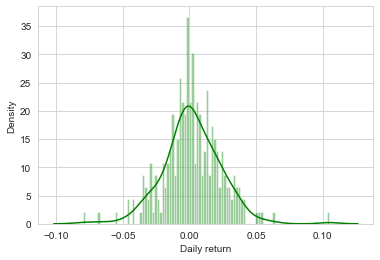

In [69]:
sns.distplot(AAPL['Daily return'].dropna(), bins = 100,color = 'green')

In [70]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-15,0.012367,0.004720,0.006392,0.010868
2020-06-16,0.026502,0.016107,0.024505,0.016555
2020-06-17,-0.001392,0.005822,0.003461,0.009831
2020-06-18,0.000398,-0.010447,0.010709,0.004922
2020-06-19,-0.005715,-0.002953,-0.005960,0.007924


In [71]:
rets['AAPL'].quantile(0.05)   #worst daily loss won't be greater than 3.3% at 95% CI

-0.03315361479370249

In [ ]:
#EX: if you've invested 1 million, then your daily loss at 5% variancerate is 1,000,000 * 0.033 = $33,000

In [72]:
#Monte carlo method , refer to MC formula 

days = 365

dt = 1/days 

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [ ]:
#using monte carlo method to run simulations with many market conditions. Then use the aggregations of all these simulations
# to establish how risky the stock is

In [76]:
def stock_monte_carlo(stock_price,days,mu,sigma):
    price = np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt 
        price[x] = price[x-1] + (price[x-1]* (drift[x] +shock[x]))
    return price

In [74]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-12,1437.000000,1386.020020,1428.489990,1413.180054,1946400,1413.180054
2020-06-15,1424.800049,1387.920044,1390.800049,1419.849976,1503900,1419.849976
2020-06-16,1455.020020,1425.900024,1445.219971,1442.719971,1709200,1442.719971
2020-06-17,1460.000000,1431.380005,1447.160034,1451.119995,1549600,1451.119995
2020-06-18,1451.410034,1427.010010,1449.160034,1435.959961,1581900,1435.959961


Text(0.5, 1.0, 'monte carlo analysis for google')

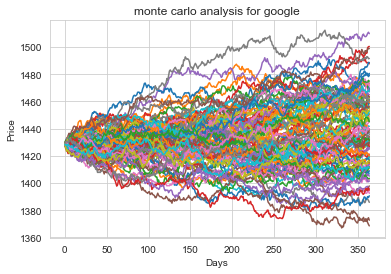

In [77]:
start_price = 1428.48

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('monte carlo analysis for google')

In [80]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days, mu, sigma)[days-1]
    

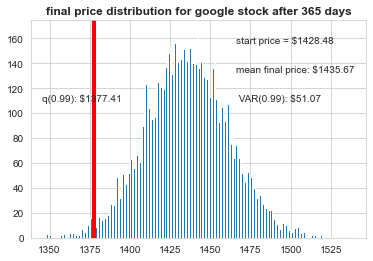

In [81]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins = 200)

#start_price
plt.figtext(0.6,0.8, s="start price = $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7, "mean final price: $%.2f" %simulations.mean())

#variance of the price
plt.figtext(0.6,0.6," VAR(0.99): $%.2f" % (start_price -q,))

#display a 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#plot a line at 1% quantile 
plt.axvline(x=q,linewidth=4,color = 'r')

#title
plt.title(u'final price distribution for google stock after %s days' %days, weight ='bold');

# 1% empirical quantile of the final price distribution to estimate the value at risk for Google stock, which is 51.07 dollars for every investment of 1428.48 dollars

This means for every inital stock purchased , you put about 51.07 dollars at risk 99% of the time